# Gulf of Mexico Estuaries - Try the example workflow in other estuaries

## Standardize, clean and wrangle Water Quality Portal data in Gulf of Mexico Estuaries into more analytic-ready formats using the harmonize_wq package. 

This demo can be run one estuary at a time, or on all GOM estuaturies (SLOW!), but goes into less detail than the other demo notebooks.

Import the required libraries

In [1]:
import sys
#!python -m pip uninstall harmonize-wq --yes
# Use pip to install the package from pypi or the latest from github
#!{sys.executable} -m pip install harmonize-wq
# For latest dev version
#!{sys.executable} -m pip install git+https://github.com/USEPA/harmonize-wq.git

In [2]:
import os
import geopandas
import pandas
from harmonize_wq import harmonize
from harmonize_wq import convert
from harmonize_wq import wrangle
from harmonize_wq import clean
from harmonize_wq import location
from harmonize_wq import visualize
import dataretrieval.wqp as wqp

### Define Gulf of Mexico Estuaries

In [3]:
# Read geometry for Area of Interest from geojson file url
# NOTE: alternatively you can direct it to a local shapefile
aoi_url = r'https://raw.githubusercontent.com/USEPA/harmonize-wq/demo_refresh/harmonize_wq/tests/data/NCCA_dissolved_GOM.geojson'

<Axes: >

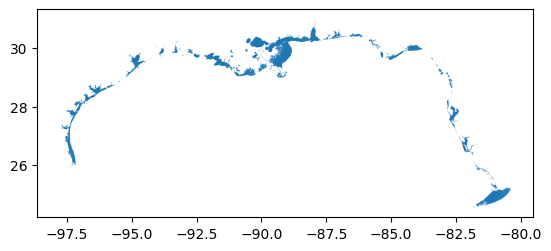

In [4]:
# Plot all the Gulf of Mexico Estuaries (geojson is WGS1984 standard)
wrangle.as_gdf(aoi_url).plot()

### Work through select estuary

In [5]:
aoi_gdf_all = wrangle.as_gdf(aoi_url)
aoi_gdf_all

,FID,EDACDA_NM,Shape_Leng,Shape_Area,geometry
0,0,_CDA_G045 (Big Cypre,2.459210e+05,4.845854e+07,"MULTIPOLYGON (((-81.78476 26.15005, -81.78529 ..."
1,1,_CDA_G053 (Charlotte,3.561144e+05,2.114096e+08,"MULTIPOLYGON (((-82.05840 26.46641, -82.05852 ..."
2,2,_CDA_G056 (Sarasota,1.732806e+05,2.514034e+07,"MULTIPOLYGON (((-82.25248 26.86147, -82.25213 ..."
3,3,_CDA_G074 (Crystal-P,1.709528e+06,3.854249e+08,"MULTIPOLYGON (((-82.73757 28.16579, -82.73827 ..."
4,4,_CDA_G078 (Waccasass,2.614051e+05,7.605671e+07,"MULTIPOLYGON (((-82.76983 29.08619, -82.77043 ..."
5,5,_CDA_G083 (Waccasass,2.257102e+05,7.069493e+07,"POLYGON ((-83.05707 29.20088, -83.05660 29.201..."
6,6,_CDA_G086 (Econfina-,1.298006e+05,2.603907e+07,"MULTIPOLYGON (((-83.31348 29.48099, -83.31419 ..."
7,7,_CDA_G095 (New),4.171870e+04,2.324903e+07,"POLYGON ((-84.44020 29.92805, -84.44102 29.928..."
8,8,_CDA_G108 (St. Andre,1.521129e+05,1.893677e+08,"MULTIPOLYGON (((-85.31034 29.83278, -85.30973 ..."
9,9,_CDA_G145 (Perdido B,3.018001e+04,1.046314e+07,"POLYGON ((-87.69336 30.25454, -87.69204 30.255..."


Choose an index for the estuary to retrieve

In [6]:
i = 25

In [7]:
# Print reformated estuary name
estuary_name = aoi_gdf_all.iloc[i]['EDACDA_NM']
out_est_name = str(estuary_name).replace(" ", "_")
out_est_name = out_est_name.replace(".", "")
out_est_name = out_est_name.replace("(", "")
out_est_name = out_est_name.replace(")", "")
print('Estuary Name: "{}" -> "{}"'.format(estuary_name, out_est_name))

Estuary Name: "Galveston Bay" -> "Galveston_Bay"


In [8]:
# Get polygon from polygons
aoi_gdf = aoi_gdf_all.iloc[i:i+1]

<Axes: >

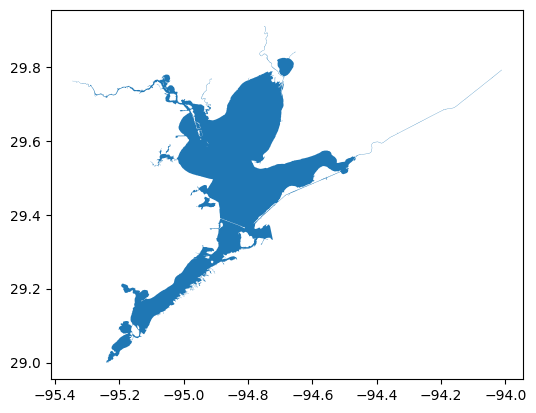

In [9]:
# Map selection
aoi_gdf.plot()

#### Build Query

In [10]:
# Each estuary may be multi-polygon, so the query will be built around the full extent instead of one row
bBox = wrangle.get_bounding_box(aoi_gdf)

In [11]:
# Build query
query = {'characteristicName': ['Phosphorus',
                                'Temperature, water',
                                'Depth, Secchi disk depth',
                                'Dissolved oxygen (DO)',
                                'Salinity',
                                'pH',
                                'Nitrogen',
                                'Conductivity',
                                'Organic carbon',
                                'Chlorophyll a',
                                'Turbidity',
                                'Sediment',
                                'Fecal Coliform',
                                'Escherichia coli']}
query['bBox'] = bBox

#### Retrieve Data

In [12]:
query['dataProfile'] = 'narrowResult'
res_narrow, md_narrow = wqp.get_results(**query)

# dataframe of downloaded results
res_narrow

C:\Users\jbousqui\Local_GIS\Python\v_envs\jupyter-harmonize-39\lib\site-packages\dataretrieval\wqp.py:83: DtypeWarning: Columns (4,5,9,10,15,17,19,22,31,33,34,36,38,61,62,63,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(StringIO(response.text), delimiter=',')


,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,AnalysisEndTime/TimeZoneCode,ResultLaboratoryCommentCode,ResultLaboratoryCommentText,ResultDetectionQuantitationLimitUrl,LaboratoryAccreditationIndicator,LaboratoryAccreditationAuthorityName,TaxonomistAccreditationIndicator,TaxonomistAccreditationAuthorityName,LabSamplePreparationUrl,ProviderName
0,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14363288,2013-10-10,NaN,NaN,TCEQMAIN-11455,STORET-422883712,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
1,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-13702013,2013-04-29,NaN,NaN,TCEQMAIN-15224,STORET-422578803,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
2,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-13947279,2013-07-11,NaN,NaN,TCEQMAIN-11446,STORET-422881708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
3,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14117837,2013-01-28,NaN,NaN,TCEQMAIN-11370,STORET-422872173,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
4,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14208371,2013-07-16,NaN,NaN,TCEQMAIN-16659,STORET-423043742,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248058,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302746,2023-07-18,11:45:00,CDT,USGS-08042554,NWIS-125841792,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
248059,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302749,2023-07-18,12:45:00,CDT,USGS-08042546,NWIS-125842112,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
248060,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302749,2023-07-18,12:45:00,CDT,USGS-08042546,NWIS-125842120,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
248061,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302749,2023-07-18,12:45:00,CDT,USGS-08042546,NWIS-125842125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS


<Axes: >

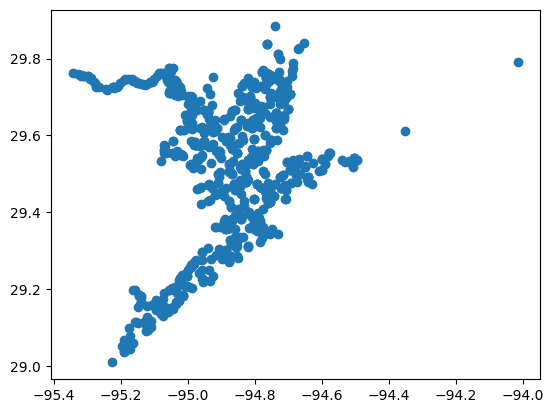

In [13]:
# Get harmonized stations clipped to the Area of Interest
stations_gdf, stations, site_md = location.get_harmonized_stations(query, aoi=aoi_gdf)
stations_gdf.plot()

#### Harmonize characteristic data (all at once)

The harmonize_all() function identifies the characteristics present and uses preset defaults to harmonize each. This function does not has as much flexibility e.g., to keep intermediate columns, produce reports, or convert to non-default units.

In [14]:
# Harmonize all results
df_harmonized = harmonize.harmonize_all(res_narrow, errors='ignore')
df_harmonized

C:\Users\jbousqui\Local_GIS\Python\v_envs\jupyter-harmonize-39\lib\site-packages\harmonize_wq\harmonize.py:131: UserWarning: WARNING: 'None' UNDEFINED UNIT for E_coli
  warn("WARNING: " + problem)
C:\Users\jbousqui\Local_GIS\Python\v_envs\jupyter-harmonize-39\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values
C:\Users\jbousqui\Local_GIS\Python\v_envs\jupyter-harmonize-39\lib\site-packages\harmonize_wq\harmonize.py:645: UserWarning: WARNING: 'MPN/100mL' converted to NaN
  warn("WARNING: '{}' converted to NaN".format(unit))
C:\Users\jbousqui\Local_GIS\Python\v_envs\jupyter-harmonize-39\lib\site-packages\harmonize_wq\harmonize.py:645: UserWarning: WARNING: 'CFU/100mL' converted to NaN
  warn("WARNING: '{}' converted to NaN".format(unit))
C:\Users\jbousqui\Local_GIS\Python\v_envs\jupyter-harmonize-39\lib\site-packages\harmonize_wq\harmonize.py:645: UserWarning: WARNING: 'hours' conve

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,DO,Fecal_Coliform,Phosphorus,TP_Phosphorus,TDP_Phosphorus,Other_Phosphorus,Temperature,Turbidity,Salinity,Conductivity
0,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14363288,2013-10-10,NaN,NaN,TCEQMAIN-11455,STORET-422883712,NaN,NaN,...,NaN,NaN,0.19 milligram / liter,NaN,NaN,0.19 milligram / liter,NaN,NaN,NaN,NaN
1,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-13702013,2013-04-29,NaN,NaN,TCEQMAIN-15224,STORET-422578803,NaN,NaN,...,NaN,NaN,0.09 milligram / liter,NaN,NaN,0.09 milligram / liter,NaN,NaN,NaN,NaN
2,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-13947279,2013-07-11,NaN,NaN,TCEQMAIN-11446,STORET-422881708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14117837,2013-01-28,NaN,NaN,TCEQMAIN-11370,STORET-422872173,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14208371,2013-07-16,NaN,NaN,TCEQMAIN-16659,STORET-423043742,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248058,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302746,2023-07-18,11:45:00,CDT,USGS-08042554,NWIS-125841792,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0 Nephelometric_Turbidity_Units,NaN,NaN
248059,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302749,2023-07-18,12:45:00,CDT,USGS-08042546,NWIS-125842112,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31.8 degree_Celsius,NaN,NaN,NaN
248060,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302749,2023-07-18,12:45:00,CDT,USGS-08042546,NWIS-125842120,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248061,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302749,2023-07-18,12:45:00,CDT,USGS-08042546,NWIS-125842125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Clean up other columns of data
df_cleaned = clean.datetime(df_harmonized)  # datetime
df_cleaned = clean.harmonize_depth(df_cleaned)  # Sample depth
df_cleaned

C:\Users\jbousqui\Local_GIS\Python\v_envs\jupyter-harmonize-39\lib\site-packages\dataretrieval\utils.py:87: UserWarning: Warning: 216464 incomplete dates found, consider setting datetime_index to False.
  warnings.warn(
C:\Users\jbousqui\Local_GIS\Python\v_envs\jupyter-harmonize-39\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,Phosphorus,TP_Phosphorus,TDP_Phosphorus,Other_Phosphorus,Temperature,Turbidity,Salinity,Conductivity,Activity_datetime,Depth
0,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14363288,2013-10-10,NaN,NaN,TCEQMAIN-11455,STORET-422883712,NaN,NaN,...,0.19 milligram / liter,NaN,NaN,0.19 milligram / liter,NaN,NaN,NaN,NaN,NaT,NaN
1,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-13702013,2013-04-29,NaN,NaN,TCEQMAIN-15224,STORET-422578803,NaN,NaN,...,0.09 milligram / liter,NaN,NaN,0.09 milligram / liter,NaN,NaN,NaN,NaN,NaT,NaN
2,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-13947279,2013-07-11,NaN,NaN,TCEQMAIN-11446,STORET-422881708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14117837,2013-01-28,NaN,NaN,TCEQMAIN-11370,STORET-422872173,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14208371,2013-07-16,NaN,NaN,TCEQMAIN-16659,STORET-423043742,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248058,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302746,2023-07-18,11:45:00,-0500,USGS-08042554,NWIS-125841792,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,46.0 Nephelometric_Turbidity_Units,NaN,NaN,2023-07-18 16:45:00+00:00,NaN
248059,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302749,2023-07-18,12:45:00,-0500,USGS-08042546,NWIS-125842112,NaN,NaN,...,NaN,NaN,NaN,NaN,31.8 degree_Celsius,NaN,NaN,NaN,2023-07-18 17:45:00+00:00,NaN
248060,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302749,2023-07-18,12:45:00,-0500,USGS-08042546,NWIS-125842120,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-18 17:45:00+00:00,NaN
248061,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302749,2023-07-18,12:45:00,-0500,USGS-08042546,NWIS-125842125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-18 17:45:00+00:00,NaN


#### Map results

<Axes: >

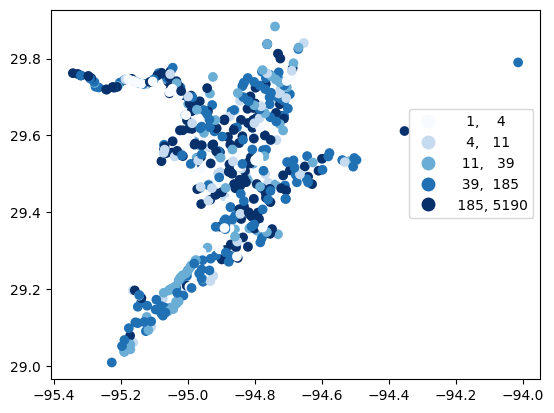

In [16]:
# Map number of usable results at each station
gdf_count = visualize.map_counts(df_cleaned, stations_gdf)
legend_kwds = {"fmt": "{:.0f}", 'bbox_to_anchor':(1, 0.75)}
gdf_count.plot(column='cnt', cmap='Blues', legend=True, scheme='quantiles', legend_kwds=legend_kwds)

<Axes: >

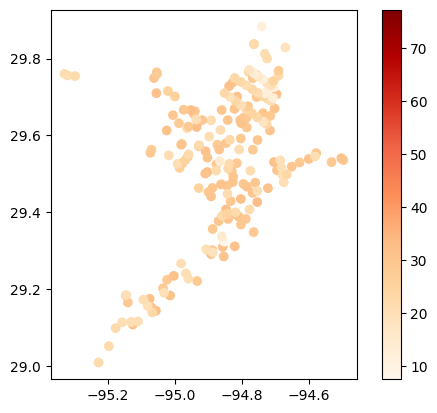

In [17]:
# Map average temperature results at each station
gdf_temperature = visualize.map_measure(df_cleaned, stations_gdf, 'Temperature')
gdf_temperature.plot(column='mean', cmap='OrRd', legend=True)

#### Look through results one parameter at a time

In [18]:
# Set standard columns to look through results
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag']

Note: if there were no results for a given characteristic a result column will not be generated for that characteristic and there will be a keyError when trying to look at results, e.g., 'KeyError: "['Conductivity'] not in index"' if there are no conductivity results

In [19]:
# Secchi
df_cleaned.loc[df_cleaned['CharacteristicName']=='Depth, Secchi disk depth', cols + ['Secchi']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Secchi
15,0.40,m,NaN,0.4 meter
16,0.37,m,NaN,0.37 meter
20,0.22,m,NaN,0.22 meter
24,0.84,m,NaN,0.84 meter
31,0.38,m,NaN,0.38 meter
...,...,...,...,...
247654,12.00,in,NaN,0.30479999999999996 meter
247680,11.50,in,NaN,0.29209999999999997 meter
247737,0.46,in,NaN,0.011684 meter
247779,9.00,in,NaN,0.2286 meter


In [20]:
# Temperature
df_cleaned.loc[df_cleaned['CharacteristicName']=='Temperature, water', cols + ['Temperature']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Temperature
11536,26.2,deg C,NaN,26.2 degree_Celsius
11942,25.8,deg C,NaN,25.8 degree_Celsius
11980,30.5,deg C,NaN,30.5 degree_Celsius
12130,26.0,deg C,NaN,26.0 degree_Celsius
12164,30.5,deg C,NaN,30.5 degree_Celsius
...,...,...,...,...
248043,31.4,deg C,NaN,31.4 degree_Celsius
248047,29.1,deg C,NaN,29.1 degree_Celsius
248051,31.0,deg C,NaN,31.0 degree_Celsius
248055,32.2,deg C,NaN,32.2 degree_Celsius


In [21]:
# Dissolved Oxygen
df_cleaned.loc[df_cleaned['CharacteristicName']=='Dissolved oxygen (DO)', cols + ['DO']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,DO
11071,6.70,mg/L,NaN,6.7 milligram / liter
12846,1.70,mg/L,NaN,1.7 milligram / liter
14341,1.70,mg/L,NaN,1.7 milligram / liter
14557,1.30,mg/L,NaN,1.3 milligram / liter
14623,2.10,mg/L,NaN,2.1 milligram / liter
...,...,...,...,...
247505,5.20,mg/L,NaN,5.2 milligram / liter
247509,8.10,mg/L,NaN,8.1 milligram / liter
247517,5.50,mg/L,NaN,5.5 milligram / liter
247522,7.25,mg/L,NaN,7.25 milligram / liter


In [22]:
# pH
df_cleaned.loc[df_cleaned['CharacteristicName']=='pH', cols + ['pH']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,pH
2,7.9,None,NaN,7.9 dimensionless
3,7.8,None,NaN,7.8 dimensionless
4,7.5,None,NaN,7.5 dimensionless
5,7.4,None,NaN,7.4 dimensionless
7,8.5,None,NaN,8.5 dimensionless
...,...,...,...,...
248044,8.1,std units,NaN,8.1 dimensionless
248048,7.0,std units,NaN,7.0 dimensionless
248052,7.3,std units,NaN,7.3 dimensionless
248056,7.8,std units,NaN,7.8 dimensionless


In [23]:
# Salinity
df_cleaned.loc[df_cleaned['CharacteristicName']=='Salinity', cols + ['Salinity']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Salinity
11,28.2,ppt,NaN,28.2 Practical_Salinity_Units
12,6.8,ppt,NaN,6.8 Practical_Salinity_Units
19,25.6,ppt,NaN,25.6 Practical_Salinity_Units
23,26.7,ppt,NaN,26.7 Practical_Salinity_Units
33,32.4,ppt,NaN,32.4 Practical_Salinity_Units
...,...,...,...,...
247530,9.9,ppt,NaN,9.9 Practical_Salinity_Units
247536,3.2,ppt,NaN,3.2 Practical_Salinity_Units
247537,3.1,ppt,NaN,3.1 Practical_Salinity_Units
247539,2.8,ppt,NaN,2.8 Practical_Salinity_Units


In [24]:
# Nitrogen
df_cleaned.loc[df_cleaned['CharacteristicName']=='Nitrogen', cols + ['Nitrogen']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Nitrogen
8,0.62,mg/L,NaN,0.62 milligram / liter
28,2.50,mg/L,NaN,2.5 milligram / liter
36,2.40,mg/L,NaN,2.4 milligram / liter
44,2.40,mg/L,NaN,2.4 milligram / liter
69,0.69,mg/L,NaN,0.69 milligram / liter
...,...,...,...,...
246784,3.53,mg/L,NaN,3.53 milligram / liter
247226,1.57,mg/L,NaN,1.57 milligram / liter
247433,0.95,mg/L,NaN,0.95 milligram / liter
247438,0.80,mg/L,NaN,0.8 milligram / liter


In [25]:
# Conductivity
if 'Conductivity' in df_cleaned.columns:
    df_cleaned.loc[df_cleaned['CharacteristicName']=='Conductivity', cols + ['Conductivity']]

In [26]:
# Chlorophyll A
df_cleaned.loc[df_cleaned['CharacteristicName']=='Chlorophyll a', cols + ['Chlorophyll']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Chlorophyll
17,20.20,ug/L,NaN,0.0202 milligram / liter
27,6.25,ug/L,NaN,0.00625 milligram / liter
30,50.30,ug/L,NaN,0.0503 milligram / liter
45,16.30,ug/L,NaN,0.016300000000000002 milligram / liter
48,45.00,ug/L,NaN,0.045 milligram / liter
...,...,...,...,...
247660,2.80,ug/l,NaN,0.0028 milligram / liter
247687,24.00,ug/l,NaN,0.024 milligram / liter
247744,5.20,ug/l,NaN,0.005200000000000001 milligram / liter
247786,11.00,ug/l,NaN,0.011 milligram / liter


In [27]:
# Carbon
df_cleaned.loc[df_cleaned['CharacteristicName']=='Organic carbon', cols + ['Carbon']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Carbon
29,8.00,mg/L,NaN,8.0 milligram / liter
34,5.00,mg/L,NaN,5.0 milligram / liter
39,7.00,mg/L,NaN,7.0 milligram / liter
46,6.00,mg/L,NaN,6.0 milligram / liter
54,5.00,mg/L,NaN,5.0 milligram / liter
...,...,...,...,...
247933,5.18,mg/l,NaN,5.18 milligram / liter
247941,10.60,mg/l,NaN,10.6 milligram / liter
247942,7.37,mg/l,NaN,7.37 milligram / liter
247947,9.90,mg/l,NaN,9.9 milligram / liter


In [28]:
# Turbidity
df_cleaned.loc[df_cleaned['CharacteristicName']=='Turbidity', cols + ['Turbidity']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Turbidity
304,3.0,None,ResultMeasure/MeasureUnitCode: 'None' UNDEFINE...,3.0 Nephelometric_Turbidity_Units
334,28.0,NTU,NaN,28.0 Nephelometric_Turbidity_Units
570,3.0,None,ResultMeasure/MeasureUnitCode: 'None' UNDEFINE...,3.0 Nephelometric_Turbidity_Units
621,2.0,None,ResultMeasure/MeasureUnitCode: 'None' UNDEFINE...,2.0 Nephelometric_Turbidity_Units
679,2.0,None,ResultMeasure/MeasureUnitCode: 'None' UNDEFINE...,2.0 Nephelometric_Turbidity_Units
...,...,...,...,...
248046,9.6,FNU,NaN,9.6 Nephelometric_Turbidity_Units
248050,18.0,FNU,NaN,18.0 Nephelometric_Turbidity_Units
248054,14.0,FNU,NaN,14.0 Nephelometric_Turbidity_Units
248058,46.0,FNU,NaN,46.0 Nephelometric_Turbidity_Units


In [29]:
# Sediment
df_cleaned.loc[df_cleaned['CharacteristicName']=='Sediment', cols + ['Sediment']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,Sediment
220118,0.0091,g,NaN,NaN
220119,0.0091,g,NaN,NaN
220120,0.0000,g,NaN,NaN
220140,0.0140,g,NaN,NaN
220141,0.0136,g,NaN,NaN
...,...,...,...,...
248038,0.1214,g,NaN,NaN
248039,0.0116,g,NaN,NaN
248040,0.1478,g,NaN,NaN
248041,0.1410,g,NaN,NaN


In [30]:
# Phosphorus
df_cleaned.loc[df_cleaned['TDP_Phosphorus'].notna(), ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'TDP_Phosphorus']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,TDP_Phosphorus
196696,0.060,mg/l as P,NaN,0.06 milligram / liter
196772,0.020,mg/l as P,NaN,0.02 milligram / liter
196821,0.070,mg/l as P,NaN,0.07 milligram / liter
197032,0.020,mg/l as P,NaN,0.02 milligram / liter
197105,0.030,mg/l as P,NaN,0.03 milligram / liter
...,...,...,...,...
247740,0.049,mg/l as P,NaN,0.049 milligram / liter
247767,0.050,mg/l as P,NaN,0.05 milligram / liter
247782,0.038,mg/l as P,NaN,0.038 milligram / liter
247799,0.039,mg/l as P,NaN,0.039 milligram / liter


In [31]:
df_cleaned.loc[df_cleaned['TP_Phosphorus'].notna(), ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'QA_flag', 'TP_Phosphorus']]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,QA_flag,TP_Phosphorus
346,0.16,mg/L,NaN,0.16 milligram / liter
620,0.08,mg/L,NaN,0.08 milligram / liter
692,0.81,mg/L,NaN,0.81 milligram / liter
729,0.18,mg/L,NaN,0.18 milligram / liter
1054,0.33,mg/L,NaN,0.33 milligram / liter
...,...,...,...,...
247870,0.25,mg/l as P,NaN,0.25 milligram / liter
247922,0.33,mg/l as P,NaN,0.33 milligram / liter
247931,0.11,mg/l as P,NaN,0.11 milligram / liter
247940,0.18,mg/l as P,NaN,0.18 milligram / liter


### Characteristic to Column (long to wide format)

Note: each parameter should be compared against acceptance criteria before these steps as duplicates and bad data can be problematic

In [32]:
# Split single QA column into multiple by characteristic (rename the result to preserve these QA_flags)
df2 = wrangle.split_col(df_cleaned)
df2

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,QA_pH,QA_DO,QA_Fecal_Coliform,QA_TP_Phosphorus,QA_TDP_Phosphorus,QA_Other_Phosphorus,QA_Temperature,QA_Turbidity,QA_Salinity,QA_Conductivity
0,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14363288,2013-10-10,NaN,NaN,TCEQMAIN-11455,STORET-422883712,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-13702013,2013-04-29,NaN,NaN,TCEQMAIN-15224,STORET-422578803,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-13947279,2013-07-11,NaN,NaN,TCEQMAIN-11446,STORET-422881708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14117837,2013-01-28,NaN,NaN,TCEQMAIN-11370,STORET-422872173,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14208371,2013-07-16,NaN,NaN,TCEQMAIN-16659,STORET-423043742,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248058,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302746,2023-07-18,11:45:00,-0500,USGS-08042554,NWIS-125841792,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248059,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302749,2023-07-18,12:45:00,-0500,USGS-08042546,NWIS-125842112,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248060,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302749,2023-07-18,12:45:00,-0500,USGS-08042546,NWIS-125842120,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248061,USGS-TX,USGS Texas Water Science Center,nwistx.01.02302749,2023-07-18,12:45:00,-0500,USGS-08042546,NWIS-125842125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# This expands the single col (QA_flag) out to a number of new columns based on the unique characteristicNames and speciation
print('{} new columns'.format(len(df2.columns) - len(df_cleaned.columns)))

15 new columns


In [34]:
# Note: there are fewer rows because NAN results are also dropped in this step
print('{} fewer rows'.format(len(df_cleaned)-len(df2)))

18239 fewer rows


In [35]:
#Examine Carbon flags from earlier in notebook (note these are empty now because NAN is dropped)
cols = ['ResultMeasureValue', 'ResultMeasure/MeasureUnitCode', 'Carbon', 'QA_Carbon']
df2.loc[df2['QA_Carbon'].notna(), cols]

,ResultMeasureValue,ResultMeasure/MeasureUnitCode,Carbon,QA_Carbon


Next the table is divided into the columns of interest (main_df) and characteristic specific metadata (chars_df)

In [36]:
# split table into main and characteristics tables
main_df, chars_df = wrangle.split_table(df2)

In [37]:
# Columns still in main table
main_df.columns

Index(['OrganizationIdentifier', 'OrganizationFormalName',
       'ActivityIdentifier', 'MonitoringLocationIdentifier', 'ProviderName',
       'E_coli', 'Secchi', 'Carbon', 'Speciation', 'Chlorophyll', 'Sediment',
       'Nitrogen', 'pH', 'DO', 'Fecal_Coliform', 'Phosphorus', 'TP_Phosphorus',
       'TDP_Phosphorus', 'Other_Phosphorus', 'Temperature', 'Turbidity',
       'Salinity', 'Conductivity', 'Activity_datetime', 'Depth', 'QA_E_coli',
       'QA_Secchi', 'QA_Carbon', 'QA_Chlorophyll', 'QA_Sediment',
       'QA_Nitrogen', 'QA_pH', 'QA_DO', 'QA_Fecal_Coliform',
       'QA_TP_Phosphorus', 'QA_TDP_Phosphorus', 'QA_Other_Phosphorus',
       'QA_Temperature', 'QA_Turbidity', 'QA_Salinity', 'QA_Conductivity'],
      dtype='object')

In [38]:
# look at main table results (first 5)
main_df.head()

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,MonitoringLocationIdentifier,ProviderName,E_coli,Secchi,Carbon,Speciation,Chlorophyll,...,QA_pH,QA_DO,QA_Fecal_Coliform,QA_TP_Phosphorus,QA_TDP_Phosphorus,QA_Other_Phosphorus,QA_Temperature,QA_Turbidity,QA_Salinity,QA_Conductivity
0,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14363288,TCEQMAIN-11455,STORET,NaN,NaN,NaN,Phosphorus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-13702013,TCEQMAIN-15224,STORET,NaN,NaN,NaN,Phosphorus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-13947279,TCEQMAIN-11446,STORET,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14117837,TCEQMAIN-11370,STORET,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCEQMAIN,Texas Commission on Environmental Quality,TCEQMAIN-14208371,TCEQMAIN-16659,STORET,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Empty columns that could be dropped (Mostly QA columns)
cols = list(main_df.columns)
x = main_df.dropna(axis=1, how='all')
[col for col in cols if col not in x.columns]

['QA_Secchi',
 'QA_Carbon',
 'QA_Sediment',
 'QA_Nitrogen',
 'QA_pH',
 'QA_DO',
 'QA_TP_Phosphorus',
 'QA_TDP_Phosphorus',
 'QA_Other_Phosphorus',
 'QA_Temperature',
 'QA_Salinity',
 'QA_Conductivity']

<Axes: >

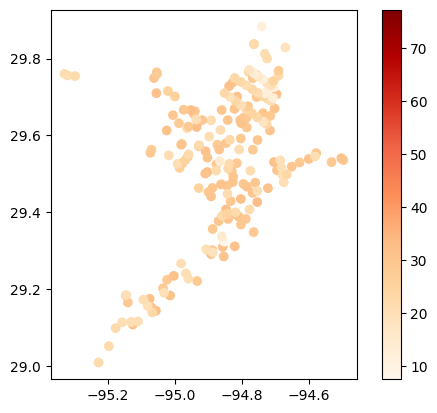

In [40]:
# Map average results at each station
gdf_avg = visualize.map_measure(main_df, stations_gdf, 'Temperature')
gdf_avg.plot(column='mean', cmap='OrRd', legend=True)